In [50]:
from PIL import Image, ImageDraw, ImageFont, ImageColor
import numpy as np
from PIL import ImageOps
import matplotlib.pyplot as plt
from PIL import ImageFilter
from PIL import ImageStat as stat

In [51]:
def statystyki(im):
    s = stat.Stat(im)
    print("extrema ", s.extrema)  # max i min
    print("count ", s.count)  # zlicza
    print("mean ", s.mean)  # srednia
    print("median ", s.median)  # mediana
    print("stddev ", s.stddev)  # odchylenie standardowe

In [52]:
im0 = Image.open("brain.png")
print(im0.mode)
print(im0.size)
statystyki(im0)

RGBA
(352, 326)
extrema  [(0, 255), (0, 255), (0, 255), (255, 255)]
count  [114752, 114752, 114752, 114752]
mean  [64.40476854433909, 64.40476854433909, 64.40476854433909, 255.0]
median  [68, 68, 68, 255]
stddev  [45.56588189784377, 45.56588189784377, 45.56588189784377, 0.0]


In [53]:
im = im0.crop((0, 2, im0.size[0], im0.size[1]))
r, g, b, a = im.split()

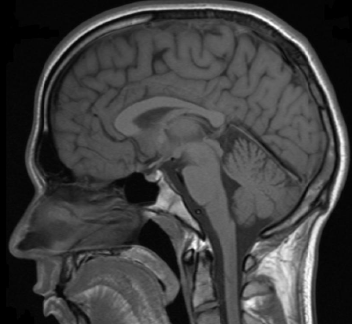

In [54]:
r

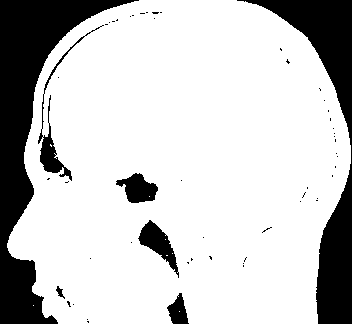

In [55]:
wsp = 11
cz_bia = r.point(lambda x: 255 if x > wsp else 0)
cz_bia

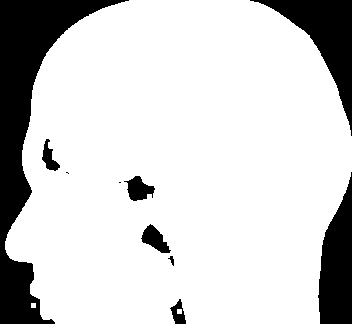

In [56]:
for _ in range(2):
    cz_bia = cz_bia.filter(ImageFilter.MaxFilter(3))
cz_bia

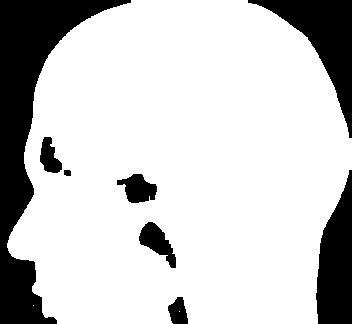

In [57]:
for _ in range(2):
    cz_bia = cz_bia.filter(ImageFilter.MinFilter(3))
cz_bia

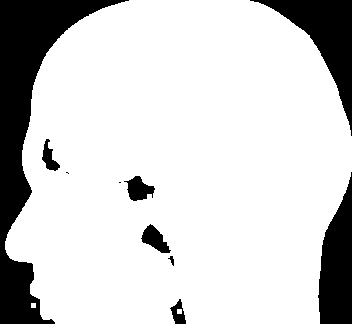

In [58]:
for _ in range(2):
    cz_bia = cz_bia.filter(ImageFilter.MaxFilter(3))
cz_bia

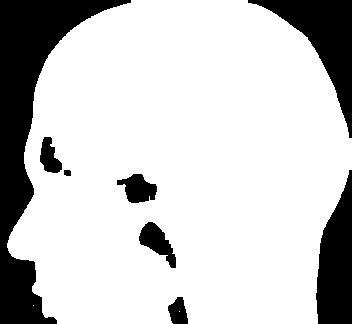

In [59]:
for _ in range(2):
    cz_bia = cz_bia.filter(ImageFilter.MinFilter(3))
cz_bia

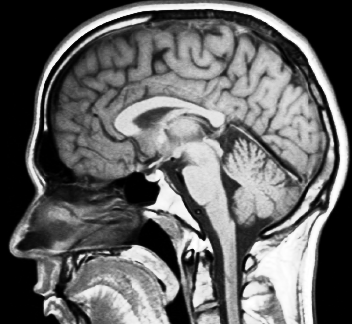

In [60]:
im_equalized1 = ImageOps.equalize(r, mask=cz_bia)
im_equalized1

<BarContainer object of 256 artists>

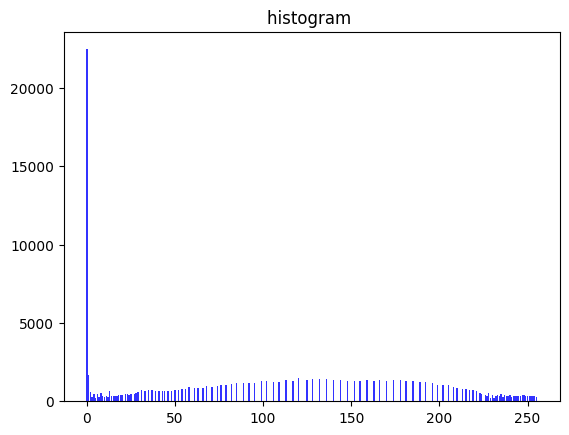

In [61]:
hist = im_equalized1.histogram()
plt.title("histogram ")
plt.bar(range(256), hist[:], color='b', alpha=0.8)

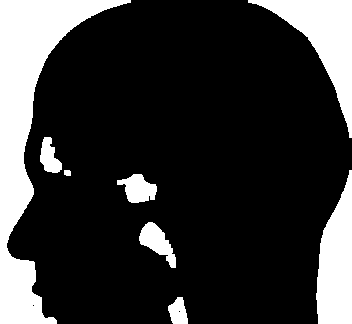

In [62]:
mask = ImageOps.invert(cz_bia)
mask

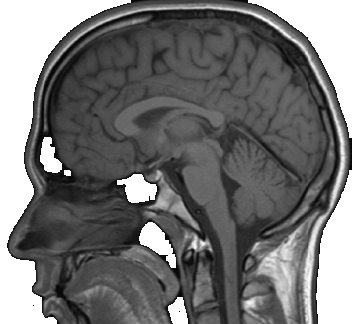

In [63]:
blank = im.point(lambda i: i*0)
comp = Image.composite(blank, im,  mask)
comp

1018 665


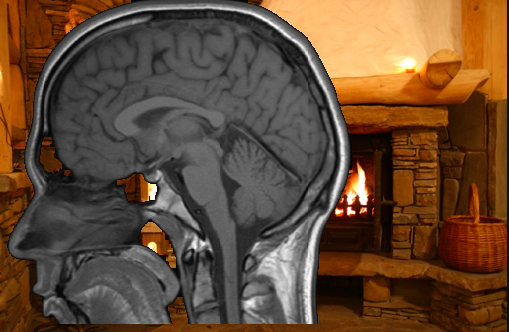

In [64]:
tlo  = Image.open("kominek.png")
w,h = tlo.size
print(w,h)
maly = tlo.resize((w//2, h//2))
maly.paste(comp, (0,0), ImageOps.invert(mask))
maly
